# Prepare Validation Dataframe

In [1]:
import pandas as pd
import numpy as np 
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import modelling as ml
import pickle
import gzip, pickle, pickletools
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor


In [2]:
# Import price predictive model from 04 
filepath = '../models/casi_dt_v2.pkl'
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    model = p.load()

In [3]:
validation_df = pd.read_csv('../data/validation_modelling.csv')
validation_df.set_index('name', inplace=True)
validation_df.head()

,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,from_vivino,age,log_price,log_rating_qty,age^2,rating * log_rating_qty
name,,,,,,,,,,,,,,,,
Epicuro Appassimento 2017,172.0,10.0,30.0,3021.0,1.0,121.0,10.74,4.1,347.0,13.151740,1.0,7.0,2.373975,5.849325,49.0,23.982232
Domaines Astruc Merlot 2015,163.0,5.0,28.0,2827.0,3.0,53.0,6.46,3.2,44.0,12.190279,1.0,9.0,1.865629,3.784190,81.0,12.109407
Martin Codax Ergo Tempranillo Rioja 2018,178.0,18.0,31.0,4499.0,0.0,113.0,11.99,3.6,226.0,13.925762,1.0,6.0,2.484073,5.420535,36.0,19.513926
Jean Stodden Spatburgunder 2017,2.0,6.0,30.0,3787.0,2.0,121.0,13.45,3.5,110.0,12.841285,1.0,7.0,2.598979,4.700480,49.0,16.451681
Chateau Darmailhac Pauillac Grand Cru Classe 2015,162.0,5.0,28.0,1425.0,2.0,121.0,86.68,4.0,509.0,13.345748,1.0,9.0,4.462223,6.232448,81.0,24.929792


## Decison Tree Model

In [4]:
# Test model on validation dataset 
X = validation_df.drop(columns = ['log_price', 'price', 'age', 'age^2', 'abv', 'from_vivino'])
y = validation_df['log_price']
log_price_pred  = model.predict(X)

mse = mean_squared_error(y, log_price_pred)

print(f"Price USD Root Mean Squared Error (RMSE): {round(np.exp(np.sqrt(mse)),3)}")
print(f"R-squared score: {round(r2_score(y, log_price_pred),3)}")

Price USD Root Mean Squared Error (RMSE): 1.347
R-squared score: 0.872


In [5]:
residuals = y - log_price_pred

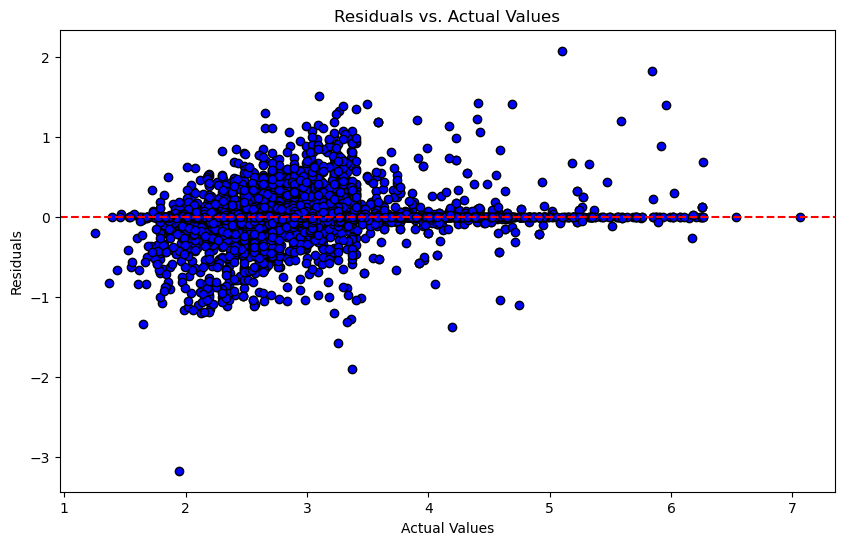

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.show()

# App Frontend Dataset

In [7]:
# For comparison purpose 
compare_frontend = pd.read_csv('../data/app_frontend.csv', index_col=0)
compare_frontend

,Region,Country,Vintage,Producer,Wine Variety,Grape Variety,Price (£),Average Rating,ABV,Log Price,Age
name,,,,,,,,,,,
14 Hands Cabernet Sauvignon 2015,Columbia Valley,United States,2015,14 Hands,Red,Cabernet Sauvignon,9.71,3.6,NaN,2.273156,9
14 Hands Merlot 2016,Columbia Valley,United States,2016,14 Hands,Red,Merlot,11.30,3.8,NaN,2.424803,8
19 Crimes Red Blend 2018,Victoria,Australia,2018,19 Crimes,Red,Red Blend,7.94,3.9,NaN,2.071913,6
19 Crimes Red Blend 2020,unknown,Australia,2020,19 Crimes,Red,Other Red Blends,8.21,3.9,NaN,2.105353,4
19 Crimes Snoop Cali Rose 2020,California,United States,2020,19 Crimes,Rose,Rose,11.49,3.9,10.5,2.441477,4
...,...,...,...,...,...,...,...,...,...,...,...
Zonin Valpolicella Ripasso Superiore 2017,Valpolicella Ripasso,Italy,2017,Zonin,Red,Unknown,7.06,3.7,NaN,1.954445,7
Zonin Veneto Velluto Appassimento 2017,Veneto,Italy,2017,Zonin,Red,Unknown,5.84,3.7,NaN,1.764731,7
Zonnebloem Cabernet Sauvignon 2018,Stellenbosch,South Africa,2018,Zonnebloem,Red,Cabernet Sauvignon,6.94,3.6,NaN,1.937302,6


In [8]:
# app_frontend = pd.read_csv('../data/validation_frontend.csv', index_col=0)
# def to_normal_case(column_name):
#     return ' '.join(word.capitalize() for word in column_name.split('_'))
# app_frontend.columns = [to_normal_case(column) for column in app_frontend.columns]
# app_frontend.rename(columns = {'Abv': 'ABV', 'Rating': 'Average Rating', 'Price' : 'Price (£)'}, inplace=True)
# app_frontend.drop(columns = ['Reviewed By', 'From Vivino', 'Rating Qty'], inplace=True)
# app_frontend['Wine Variety'] = app_frontend['Wine Variety'].apply(to_normal_case)
# app_frontend['Average Rating'] = app_frontend['Average Rating'].apply(lambda x: round(float(x),2))
# app_frontend.head()

In [9]:
# app_backend.to_csv('../data/app_backend.csv', index=False)
# app_frontend.to_csv('../data/app_frontend.csv', index=False)

# print(app_backend.shape)
# print(app_frontend.shape)